# Base Models (with and without normalizing outliers)

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)
from scipy.stats import shapiro,mannwhitneyu,chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
# from sklearn.tree import export_graphviz
import imblearn


from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

In [3]:
df = pd.read_csv('C:/Users/nabee/Desktop/CIND 820/Shoppers Data Set.csv')
dfwork = df.copy()

In [4]:
# Changing Column Types
dfwork['OperatingSystems'] = dfwork['OperatingSystems'].astype('object')
dfwork['Browser'] = dfwork['Browser'].astype('object')
dfwork['Region'] = dfwork['Region'].astype('object')
dfwork['TrafficType'] = dfwork['TrafficType'].astype('object')
dfwork['SpecialDay'] = dfwork['SpecialDay'].astype('object')

In [5]:
# getting list of numerical and categorical columns
num = dfwork.select_dtypes(include=np.number)
cat = dfwork.select_dtypes(exclude=np.number)

<!-- <p style="font-family: Arial; font-size:2.4em;color:Purple;"> Base Model 1</p> -->
# BASE MODEL 1

#### 1. Data with outliers
#### 2. Only One Hot Encoding and minmax Scaling Applied

In [6]:
# one hot encoding base df
dfbase = dfwork.copy()
dfbase['Weekend'].replace({False:0,True:1},inplace =True)
dfbase['Revenue'].replace({False:0,True:1},inplace =True)
dfbase.drop(['Region'],axis  = 1,inplace = True)
dfbase = pd.get_dummies(dfbase, columns = ['Month','VisitorType','Browser','OperatingSystems','TrafficType']).astype(int)

In [7]:
#Splitting Train and Test Data Set
y = dfbase['Revenue']
x = dfbase.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x:  (12330, 65)
Shape of y:  (12330,)
Shape of x_train : (9864, 65)
Shape of y_train : (9864,)
Shape of x_test : (2466, 65)
Shape of y_test : (2466,)


In [8]:
# Min Max Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()    
scaler.fit(x_train)       
x_train = scaler.transform(x_train)    
x_test = scaler.transform(x_test)

************************************* Confusion Matrix ******************************************


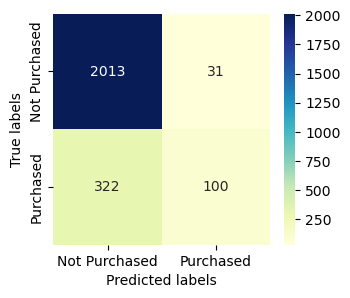

************************************* Classification Report *************************************
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2044
           1       0.76      0.24      0.36       422

    accuracy                           0.86      2466
   macro avg       0.81      0.61      0.64      2466
weighted avg       0.85      0.86      0.82      2466

************************************* description Table *****************************************


,Description,Misclassifications,Accuracy,Precision,Recall Minority,Recall Majority,Type I errors,Type II errors,F1 Score,F2 Score
0,Logistic Regression,353,0.86,0.76,0.24,0.98,31,322,0.36,0.28


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

# print("True Negative",cmlr[0,0])
# print("False Negative",cmlr[1,0])
# print("True Positive",cmlr[1,1])
# print("Ffalse Positive",cmlr[0,1])

LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred_lr = LR.predict(x_test)


cmlr = metrics.confusion_matrix(y_test, y_pred_lr)
plt.rcParams['figure.figsize'] = (3.5, 3)
ax = sns.heatmap(cmlr, fmt = 'g',annot = True,cmap="YlGnBu")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');  
ax.xaxis.set_ticklabels(['Not Purchased', 'Purchased']); ax.yaxis.set_ticklabels(['Not Purchased', 'Purchased'])
print ("************************************* Confusion Matrix ******************************************")
plt.show()

print ("************************************* Classification Report *************************************")
crlr = metrics.classification_report(y_test,y_pred_lr)
print(crlr)

print ("************************************* description Table *****************************************")
description = "Logistic Regression"  #change the name of models
# cmbase = cmbaselr

misclassifications = cmlr[0,1] + cmlr[1,0]         #FP + FN
type1 = cmlr[0,1]
type2 = cmlr[1,0]
r1 = (cmlr[1,1]  / (cmlr[1,1] + cmlr[1,0])).round(2)
r0 = (cmlr[0,0]  / (cmlr[0,0] + cmlr[0,1])).round(2)
precision = round(precision_score(y_test, y_pred_lr),2)
recall = round(recall_score(y_test,y_pred_lr),2)
accuracy = round(accuracy_score(y_test,y_pred_lr),2)
f1 = round(f1_score(y_test,y_pred_lr),2)
auc = round(roc_auc_score(y_test,y_pred_lr),2)
f2 = ((5 * precision * recall)/ (4 * precision + recall)).round(2)
df_results = pd.DataFrame(np.array([description,misclassifications,accuracy, precision, r1,r0,type1,type2,f1,f2]).reshape(1,-1)
                                     , columns=['Description','Misclassifications','Accuracy','Precision','Recall Minority','Recall Majority'
                                                ,'Type I errors','Type II errors','F1 Score','F2 Score'])
                                  # ], axis=0)
df_results

In [28]:
# Cross Validation 
import pandas as pd
import numpy as np
#Cross Validating a Model
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
# cv = KFold(n_splits = 10,shuffle = True,random_state=0)
LR = LogisticRegression()
    # Initiate a DataFrame for the averages and a list for all measures
recalls = cross_val_score(LR, x_train, y_train, scoring='recall', cv=cv)
recall_score = np.mean(recalls).round(2)
precisions = cross_val_score(LR, x_train, y_train, scoring='precision', cv=cv)
precision_score = np.mean(precisions).round(2)
accuracies = cross_val_score(LR, x_train,y_train, scoring='accuracy', cv=cv)
accuracy_score = np.mean(accuracies).round(2)
aucs = cross_val_score(LR, x_train,y_train, scoring='roc_auc', cv=cv)
auc_score = np.mean(aucs).round(2)
f1s = cross_val_score(LR, x_train,y_train, scoring='f1', cv=cv)
f1_score = np.mean(accuracies).round(2)
cv_scores = pd.DataFrame(np.array(['Logisitic Regression with outliers',accuracy_score,precision_score,recall_score,f1_score,auc_score]).reshape(1,-1)
                                     , columns=['Description','Accuracy','Precision','Recall','F1 Score','AUC'])
cv_scores

,Description,Accuracy,Precision,Recall,F1 Score,AUC
0,Logisitic Regression with outliers,0.88,0.77,0.26,0.88,0.87


# Base Model 2
1. Data transformed (BOXCOX) to minimize impact of outliers and reduced correlation
2. One Hot Encoding and Robust Scaling Applied

In [30]:
import pandas as pd

In [31]:
dfbase2 = df.copy()

In [32]:
# one hot encoding
import pandas as pd
dfbase2['Weekend'].replace({False:0,True:1},inplace =True)
dfbase2['Revenue'].replace({False:0,True:1},inplace =True)
dfbase2.drop(['Region'],axis  = 1,inplace = True)
dfbase2 = pd.get_dummies(dfbase2, columns = ['Month','VisitorType','Browser','OperatingSystems','TrafficType'])

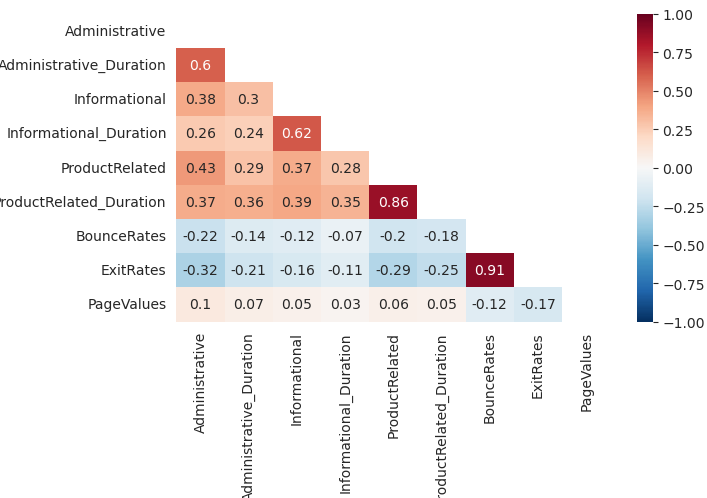

In [33]:
# Check for correlation
corr = dfbase2.iloc[: , :9].corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(7,4))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

In [34]:
#Applying  transformation
dfbase2['Administrative_Duration'],pd = st.boxcox(dfbase2['Administrative_Duration']+1)
dfbase2['Informational_Duration'],pd = st.boxcox(dfbase2['Informational_Duration']+1)
dfbase2['ProductRelated_Duration'],pd = st.boxcox(dfbase2['ProductRelated_Duration']+1)
# dfwork['BounceRates'],pd = st.boxcox(dfwork['BounceRates']+1)
# dfwork['ExitRates'],pd = st.boxcox(dfwork['ExitRates']+1)
dfbase2['BounceRates'] = dfbase2['BounceRates']**0.2 
dfbase2['ExitRates'] =dfbase2['ExitRates']**0.2 
dfbase2['PageValues'],pd = st.boxcox(dfbase2['PageValues']+1)

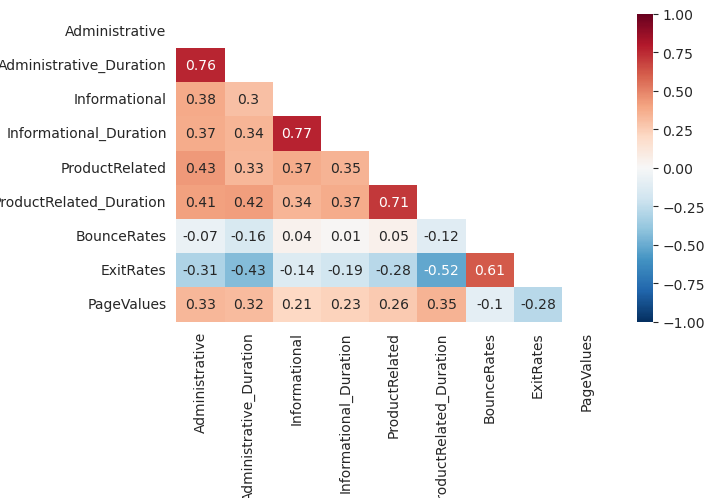

In [35]:
# Check for correlation
corr = dfbase2.iloc[: , :9].corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(7,4))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

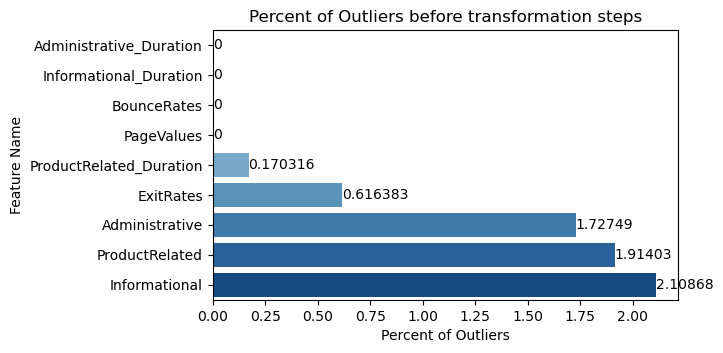

In [38]:
import pandas as pd
numerical_columns = num.columns

out_per = []
lst1 = []
lst2 = []

lst3 = []

for i in numerical_columns:
    data_mean, data_std = mean(dfbase2[i]), std(dfbase2[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # print(i, ': \n')

    # identify outliers
    outliers = [x for x in dfbase2[i] if x < lower or x > upper]
    num_out = len(outliers)
    outliers_removed = [x for x in dfbase2[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)   
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    lst1.append(i)
    lst2.append(num_out)
    lst3.append(outlier_percent)
    # print(i,'\n','Outliers: %d' %num_nout,'% of outliers ',outlier_percent)
mylist  = [lst1,lst2,lst3]
outliers_summary = pd.DataFrame(
    {'Feature Name': lst1,
     'Total Outliers': lst2,
     'Percent of Outliers': lst3
    })
outliers_summary = outliers_summary.sort_values('Percent of Outliers', ascending = True)
plt.rcParams['figure.figsize'] = (6, 3.5)
ax = sns.barplot(y = outliers_summary['Feature Name'] ,x = outliers_summary['Percent of Outliers'], palette = 'Blues') 
plt.title('Percent of Outliers after transformation steps')
for i in ax.containers:
     ax.bar_label(i,)
plt.show()

In [39]:
#Splitting Train and Test Data Set
yb2 = dfbase2['Revenue']
xb2 = dfbase2.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", xb2.shape)
print("Shape of y: ", yb2.shape)

xb2_train, xb2_test, yb2_train, yb2_test = train_test_split(xb2, yb2, test_size =  0.2, random_state = 0)

# print("Shape of x_train :", x_train.shape)
# print("Shape of y_train :", y_train.shape)
# print("Shape of x_test :", x_test.shape)
# print("Shape of y_test :", y_test.shape)

Shape of x:  (12330, 65)
Shape of y:  (12330,)


In [40]:
# Min Max Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()    
scaler.fit(x_train)       
xb2_train = scaler.transform(xb2_train)    
xb2_test = scaler.transform(xb2_test)

************************************* Confusion Matrix ******************************************


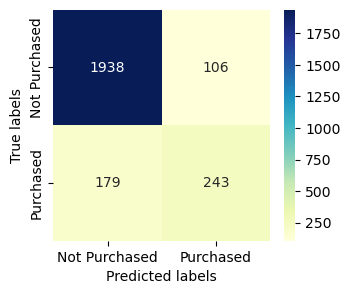

************************************* Classification Report *************************************
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2044
           1       0.70      0.58      0.63       422

    accuracy                           0.88      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.88      0.88      0.88      2466

************************************* description Table *****************************************


,Description,Misclassifications,Accuracy,Precision,Recall Minority,Recall Majority,Type I errors,Type II errors,F1 Score,F2 Score
0,Logistic Regression,285,0.88,0.7,0.58,0.95,106,179,0.63,0.6


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

# print("True Negative",cmlr[0,0])
# print("False Negative",cmlr[1,0])
# print("True Positive",cmlr[1,1])
# print("Ffalse Positive",cmlr[0,1])

LR = LogisticRegression()
LR.fit(xb2_train, yb2_train)
yb2_pred_lr = LR.predict(xb2_test)


b2cmlr = metrics.confusion_matrix(yb2_test, yb2_pred_lr)
plt.rcParams['figure.figsize'] = (3.5, 3)
ax = sns.heatmap(b2cmlr, fmt = 'g',annot = True,cmap="YlGnBu")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');  
ax.xaxis.set_ticklabels(['Not Purchased', 'Purchased']); ax.yaxis.set_ticklabels(['Not Purchased', 'Purchased'])
print ("************************************* Confusion Matrix ******************************************")
plt.show()

print ("************************************* Classification Report *************************************")
crlr = metrics.classification_report(yb2_test,yb2_pred_lr)
print(crlr)

print ("************************************* description Table *****************************************")
description = "Logistic Regression"  #change the name of models
# cmbase = cmbaselr

b2misclassifications = b2cmlr[0,1] + b2cmlr[1,0]         #FP + FN
b2type1 = b2cmlr[0,1]
b2type2 = b2cmlr[1,0]
b2r1 = (b2cmlr[1,1]  / (b2cmlr[1,1] + b2cmlr[1,0])).round(2)
b2r0 = (b2cmlr[0,0]  / (b2cmlr[0,0] + b2cmlr[0,1])).round(2)
b2precision = round(precision_score(yb2_test, yb2_pred_lr),2)
b2recall = round(recall_score(yb2_test,yb2_pred_lr),2)
b2accuracy = round(accuracy_score(yb2_test,yb2_pred_lr),2)
b2f1 = round(f1_score(yb2_test,yb2_pred_lr),2)
b2auc = round(roc_auc_score(yb2_test,yb2_pred_lr),2)
b2f2 = ((5 * b2precision * b2recall)/ (4 * b2precision + b2recall)).round(2)
b2df_results = pd.DataFrame(np.array([description,b2misclassifications,b2accuracy, b2precision, b2r1,b2r0,b2type1,b2type2,b2f1,b2f2]).reshape(1,-1)
                                     , columns=['Description','Misclassifications','Accuracy','Precision','Recall Minority','Recall Majority'
                                                ,'Type I errors','Type II errors','F1 Score','F2 Score'])
                                  # ], axis=0)
b2df_results

************************************* Confusion Matrix ******************************************


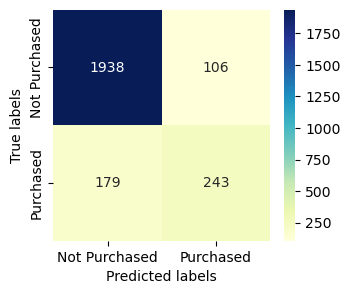

************************************* Classification Report *************************************
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2044
           1       0.70      0.58      0.63       422

    accuracy                           0.88      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.88      0.88      0.88      2466

************************************* description Table *****************************************


,Description,Misclassifications,Accuracy,Precision,Recall Minority,Recall Majority,Type I errors,Type II errors,F1 Score,F2 Score
0,Logistic Regression,285,0.88,0.7,0.58,0.95,106,179,0.63,0.6


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

# print("True Negative",cmlr[0,0])
# print("False Negative",cmlr[1,0])
# print("True Positive",cmlr[1,1])
# print("Ffalse Positive",cmlr[0,1])

LR = LogisticRegression()
LR.fit(xb2_train, yb2_train)
yb2_pred_lr = LR.predict(xb2_test)


b2cmlr = metrics.confusion_matrix(yb2_test, yb2_pred_lr)
plt.rcParams['figure.figsize'] = (3.5, 3)
ax = sns.heatmap(b2cmlr, fmt = 'g',annot = True,cmap="YlGnBu")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');  
ax.xaxis.set_ticklabels(['Not Purchased', 'Purchased']); ax.yaxis.set_ticklabels(['Not Purchased', 'Purchased'])
print ("************************************* Confusion Matrix ******************************************")
plt.show()

print ("************************************* Classification Report *************************************")
crlr = metrics.classification_report(yb2_test,yb2_pred_lr)
print(crlr)

print ("************************************* description Table *****************************************")
description = "Logistic Regression"  #change the name of models
# cmbase = cmbaselr

b2misclassifications = b2cmlr[0,1] + b2cmlr[1,0]         #FP + FN
b2type1 = b2cmlr[0,1]
b2type2 = b2cmlr[1,0]
b2r1 = (b2cmlr[1,1]  / (b2cmlr[1,1] + b2cmlr[1,0])).round(2)
b2r0 = (b2cmlr[0,0]  / (b2cmlr[0,0] + b2cmlr[0,1])).round(2)
b2precision = round(precision_score(yb2_test, yb2_pred_lr),2)
b2recall = round(recall_score(yb2_test,yb2_pred_lr),2)
b2accuracy = round(accuracy_score(yb2_test,yb2_pred_lr),2)
b2f1 = round(f1_score(yb2_test,yb2_pred_lr),2)
b2auc = round(roc_auc_score(yb2_test,yb2_pred_lr),2)
b2f2 = ((5 * b2precision * b2recall)/ (4 * b2precision + b2recall)).round(2)
b2df_results = pd.DataFrame(np.array([description,b2misclassifications,b2accuracy, b2precision, b2r1,b2r0,b2type1,b2type2,b2f1,b2f2]).reshape(1,-1)
                                     , columns=['Description','Misclassifications','Accuracy','Precision','Recall Minority','Recall Majority'
                                                ,'Type I errors','Type II errors','F1 Score','F2 Score'])
                                  # ], axis=0)
b2df_results

In [43]:
# Cross Validation 
import pandas as pd
import numpy as np
#Cross Validating a Model
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
# cv = KFold(n_splits = 10,shuffle = True,random_state=0)
LR = LogisticRegression()
    # Initiate a DataFrame for the averages and a list for all measures
recalls = cross_val_score(LR, xb2_train, yb2_train, scoring='recall', cv=cv)
recall_score = np.mean(recalls).round(2)
precisions = cross_val_score(LR, xb2_train, yb2_train, scoring='precision', cv=cv)
precision_score = np.mean(precisions).round(2)
accuracies = cross_val_score(LR, xb2_train,yb2_train, scoring='accuracy', cv=cv)
accuracy_score = np.mean(accuracies).round(2)
aucs = cross_val_score(LR, xb2_train,yb2_train, scoring='roc_auc', cv=cv)
auc_score = np.mean(aucs).round(2)
f1s = cross_val_score(LR, xb2_train,yb2_train, scoring='f1', cv=cv)
f1_score = np.mean(accuracies).round(2)
cv_scores = pd.DataFrame(np.array(['Logisitic Regression with outliers',accuracy_score,precision_score,recall_score,f1_score,auc_score]).reshape(1,-1)
                                     , columns=['Description','Accuracy','Precision','Recall','F1 Score','AUC'])
cv_scores

,Description,Accuracy,Precision,Recall,F1 Score,AUC
0,Logisitic Regression with outliers,0.9,0.7,0.59,0.9,0.91
